識別用にCV Splitを実施する

混合行列をみると間違っているのはUSB_micro_B_W and USB_Micro_Bのペアであった
2class識別を作成してみる

In [41]:
# modules

import os
import numpy as np
import pandas as pd
from pathlib import Path
import shutil
import glob
from typing import List, Optional
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold
#from sklearn.model_selection  import StratifiedGroupKFold

%matplotlib inline

In [42]:
train_ori = pd.read_csv('../../input/csv/train.csv')
train_add = pd.read_csv('../../input/csv/additional_data.csv')
train = pd.concat([train_ori, train_add], axis=0, ignore_index=True)
train['class'].unique()

array(['HDMI', 'USB_Mini', 'Dock', 'Lightning', 'USB_Micro_B',
       'Mini_DisplayPort', 'RJ_45', 'USB_Type_A', 'USB_Type_C',
       'USB_Micro_B_3.1', 'USB_Type_B', 'Lightning_T', 'USB_Micro_B_W',
       'VGA', 'DisplayPort'], dtype=object)

In [43]:
df = None
df = pd.concat([df,train[train['class'] == 'USB_Micro_B_W']], axis=0, ignore_index=True)
df = pd.concat([df,train[train['class'] == 'USB_Micro_B']], axis=0, ignore_index=True)

In [44]:
class CFG:
    seed=42
    target_col='class'
    n_fold=10
    trn_fold=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [45]:
folds = df.copy()
Fold = StratifiedKFold(n_splits=CFG.n_fold, shuffle=True, random_state=CFG.seed)
for n, (train_index, val_index) in enumerate(Fold.split(folds, folds['class'])):
    folds.loc[val_index, 'fold'] = int(n)
folds['fold'] = folds['fold'].astype(int)
print(folds.groupby(['fold', 'class']).size())

fold  class        
0     USB_Micro_B      94
      USB_Micro_B_W     7
1     USB_Micro_B      94
      USB_Micro_B_W     7
2     USB_Micro_B      93
      USB_Micro_B_W     7
3     USB_Micro_B      93
      USB_Micro_B_W     7
4     USB_Micro_B      93
      USB_Micro_B_W     7
5     USB_Micro_B      93
      USB_Micro_B_W     7
6     USB_Micro_B      93
      USB_Micro_B_W     7
7     USB_Micro_B      93
      USB_Micro_B_W     7
8     USB_Micro_B      94
      USB_Micro_B_W     6
9     USB_Micro_B      94
      USB_Micro_B_W     6
dtype: int64


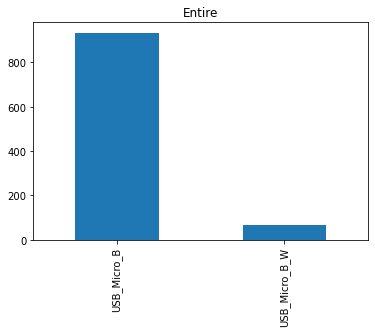

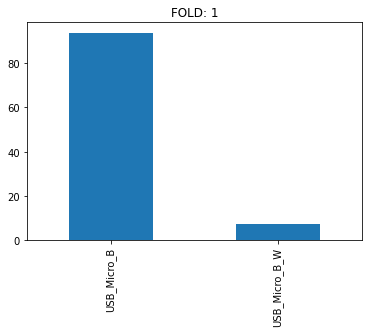

In [46]:
plt.title('Entire')
folds['class'].value_counts().plot(kind="bar")
plt.show()

plt.title('FOLD: 1')
folds[folds['fold'] == 0]['class'].value_counts().plot(kind="bar")
plt.show()

In [47]:
#with open('../../csv2cocojson/dataset_ids/labels.txt') as f:
#    label_map = [s.strip() for s in f.readlines()]
#    print(label_map, len(label_map))

label_map = ['USB_Micro_B', 'USB_Micro_B_W']

In [48]:
label = []
targets = folds['class'].tolist()
for target in targets:
    label.append(label_map.index(target))
print(len(label))

1002


In [49]:
folds['target'] = label

In [50]:
folds

,filename,Xmin_Ymin_Xmax_Ymax,class,filename_trim,fold,target
0,609c2424.jpg,"[797, 1118, 1395, 1773]",USB_Micro_B_W,NaN,6,1
1,0f0213af.jpg,"[1420, 2144, 2260, 2984]",USB_Micro_B_W,NaN,2,1
2,db699710.jpg,"[1089, 1593, 1935, 2439]",USB_Micro_B_W,NaN,0,1
3,aea7c84e.jpg,"[1573, 2395, 2029, 2693]",USB_Micro_B_W,NaN,1,1
4,a00c249b.jpg,"[383, 860, 720, 1054]",USB_Micro_B_W,NaN,4,1
...,...,...,...,...,...,...
997,2c58b3a6.jpg,NaN,USB_Micro_B,2c58b3a6_trim.jpg,1,0
998,9c05d48b.jpg,NaN,USB_Micro_B,9c05d48b_trim.jpg,5,0
999,b1585fdb.jpg,NaN,USB_Micro_B,b1585fdb_trim.jpg,7,0
1000,48f89b63.jpg,NaN,USB_Micro_B,48f89b63_trim.jpg,4,0


In [51]:
folds.to_csv('../../input/train_with_fold_USBmicro.csv', index=False)